## Soft margin SVM

In [1]:
# # C values to GridSearch over
# pgrid = {"C": np.linspace(0.0001, 2, 10)}

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

As we increase `C`, what happens to our bias-variance tradeoff?

- If C is small: We regularize substantially, leading to a less perfect classification of our training data. --> Bias increases, variance decreases.
- If C is large: We do not regularize much, leading to a more perfect classification of our training data. --> Bias decreases, variance increases.  

In [4]:
# # (THREAD) Instantiate and fit a gridsearch model for this SVC!
# svc = LinearSVC(max_iter=20000)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# gcv = GridSearchCV(svc, pgrid, cv=cv)
# gcv.fit(X_sc, y);

In [5]:
# # What is the best cross-validated score?
# gcv.best_score_

# # What is the best model?
# gcv.best_params_

In [6]:
# # Save cv results as a DataFrame
# df = pd.DataFrame(gcv.cv_results_)

# # Visualize how different values of C affect accuracy
# plt.plot("param_C", "mean_test_score", data = df)

## Kernel SVMs

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

#### Parameter: `kernel`
There are several options:
* `linear`, `rbf`, `polynomial`, `sigmoid`, or something custom

**Which do we use?**
- **Quick answer**: As long as it's not the linear kernel, it actually matters surprisingly little!
- **Lazy answer**: Use the RBF kernel, as it's usually best (or no different from other options).
- **Better answer**: It's a model parameter that you're free to gridsearch over!

## Loading with MNIST Digits Dataset (Kernel SVM)

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load digits.
digits = datasets.load_digits()

# Check out data.
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
# How many observations do we have?
# NOTE: Data is in a NumPy array!
print(type(digits.data))
print(digits.data.shape)
print(digits.target.shape)

<class 'numpy.ndarray'>
(1797, 64)
(1797,)


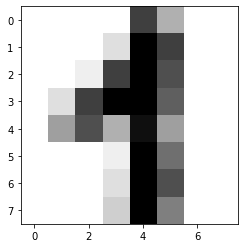

In [10]:
# Generate heatmap.
plt.imshow(
    digits.images[42],
    cmap=plt.cm.gray_r,
);

In [12]:
# What is the actual class?
digits.target[42]

1

In [15]:
# Create X and y.
X, y = digits.data, digits.target

In [18]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [22]:
# Instantiate support vector machine.
svc = SVC(gamma="scale")

In [23]:
# Fit support vector machine to training data.
svc.fit(X_train, y_train)

SVC()

In [24]:
# Generate predictions.
y_pred = svc.predict(X_test)

In [25]:
# Measure performance based on accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9865319865319865

- Accuracy is likely the best metric to use here. Improperly classifying a number is equally bad, no matter what number you incorrectly predict. For example, misclassifying a `4` as a `3` or `5` or `9` is equally bad.
- Many of our other classification metrics (like sensitivity and specificity) don't easily generalize to classification with more than two classes.

SVMs can be used for both classifications and regressions (specify c and kernel).<br>
Regression more complicated, but use SVR instead of SVC, then fit and predict.

# Pros and Cons of SVMs

#### Pros
- Exceptional perfomance (historically widely used)
- Effective in high-dimensional data
- Can work with non-linear boundaries
- Fast to compute with most datasets (kernel trick)

#### Cons
- Black box method
- Can be slow on large (tall) datasets

# Concluding Remarks and Fun Facts
* SVMs are fantastic models if all you care about is predictive ability.
* They are complete and total black boxes, sorry.
* You must scale your data.
* By the way, doing a kernel SVM with polynomial kernel degree = 2 has been shown to work really well for NLP data!